# EP4210 Computational Physics
Module 5

## Boundary Value Problems
Consider the Poisson Equation:
$$ \nabla^2 \phi = - \frac \rho {\epsilon_0} $$
$$ \nabla^2 \phi = \frac{\partial^2 \phi }{\partial x^2} + \frac{\partial^2 \phi }{\partial y^2} + \frac{\partial^2 \phi }{\partial z^2}$$
Uniqueness theorem- There exists a unique solution to the Poisson equation if the boundary conditions are specified. The uniqueness theorem states that if two solutions to the Poisson equation are found, they must be the same solution.

## General ODE
$$ f''(x) + p(x)f'(x) + q(x)f(x)=0 $$
To solve it using RK methods, we need to reduce it to a first order ODE by substituting $f'(x)$ with $y$ and $f''(x)$ with $y' = -pf' -qf = -py-qf$ 
$$ \begin{bmatrix} y \\ f\end{bmatrix}' = \begin{bmatrix} -p & -q \\ 1 & 0\end{bmatrix} \begin{bmatrix} y \\ f\end{bmatrix}$$
- We can assume some value for $y_a$ denote it as $\tilde y_a$. We are guessing the value of the initial derivative and hope to get a function the satisfies the given constraints. 
- Now that we know $f_a$ and $\tilde y_a$, we can use RK Method to solve the ODE.
- Integrate upto x=b and obtain $f_b$ and $\tilde f_b$.
- $\tilde f_b$ may not be matching boundary condition $\implies$ guess is wrong
- Repeat the process with new guess $\hat y_a$ until we get $\tilde f_b$ matching boundary condition.
- $\tilde f_b$ will be a function of our initial guess- $\tilde f_b = F(x_b, \tilde y_a)$
- For the initial point, we need not do random guesses but solve for the root of the function $\tilde f_b = F(x_b, \tilde y_a)$

## Finite Difference Methods
$$ f''(x) + p(x) f'(x) +q(x)f(x) = s(x) $$
We have the boundary values $f(x=0) = f_0$ and $f(x=a) = f_a$ and the functions $p, q, s$ are known. We need to solve for $f(x), x\in [0,a]$.

We divide the space into $N+1$ intervals of width $\Delta x$. Say $f_i = f(x_i)$ so that 
$$\frac{f_{n+1}-f_{n-1}}{2 \Delta x} = f'(x_n) + O(\Delta x^2)$$
$$\frac{f_{n+1}-2f_n +f_{n-1}}{\Delta x^2} = f''(x_n) + O(\Delta x^2)$$
This is called the central difference approximation. The function we need to solve for is therefore,
$$ \frac{f_{n+1}-2f_n +f_{n-1}}{\Delta x^2} + \frac{p_n(f_{n+1}-f_{n-1})}{2 \Delta x} + q_n f_n = s_n $$
The differential equation is now approximated to an algebraic equation.
$$ f_{n+1} \Bigg[ \frac{1}{\Delta x^2} + \frac{p_n}{2 \Delta x} \Bigg] + f_{n-1} \Bigg[ \frac{1}{\Delta x^2} - \frac{p_n}{2 \Delta x} \Bigg] + f_{n} \Bigg[ q_n + \frac{2}{2 \Delta x^2} \Bigg] = s_n$$
Which may be represented by a matrix as:
$$ \begin{bmatrix} (\frac{1}{\Delta x^2} - \frac{p_n}{2 \Delta x}) & (q_n + \frac{2}{2 \Delta x^2}) & (\frac{1}{\Delta x^2} + \frac{p_n}{2 \Delta x}) \end{bmatrix} \begin{bmatrix} f_{n-1} \\ f_n \\ f_{n+1} \end{bmatrix} = s_n$$
We will have problem defining the differential at the boundary points $n=0, n=N$ as we get $f_{-1}, f_{N+1}$ which is outside our domain. 
We can represent the rest of the points as a huge $N-1 \times N-1$ matrix.
$$ \begin{bmatrix} 1 & -2 & 1 & 0 & 0 & \cdots & 0 \\ 0 & 1 & -2 & 1 & 0 & \cdots & 0 \\ \vdots & & & & & \vdots \\ 0 & & &\cdots & 1 & -2 & -1 \end{bmatrix}  \begin{bmatrix} f_1 \\ f_2 \\ f_3 \\ \vdots \\ f_{N-1} \end{bmatrix} = \begin{bmatrix} \vdots \\ s \\ \vdots \end{bmatrix} -\begin{bmatrix} \vdots \\ bound \\ \vdots \end{bmatrix} $$
Instead of $1, -2, 1$ we will have $\frac{1}{\Delta x^2} - \frac{p_n}{2 \Delta x}$, $q_n + \frac{2}{2 \Delta x^2}$, $\frac{1}{\Delta x^2} + \frac{p_n}{2 \Delta x}$
$$D..F=S-B$$
$$F=D^{-1}(S-B)$$
Matrix inversion may be expensive, but the standard method is Gauss-Seidel Method.

Exercise:
$$f''(x)+sin(x)f'(x)+f(x)=0$$

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [12]:
np.zeros(100)[0]

0.0

In [22]:

p = lambda x: math.sin(x)
q = lambda x: 1
s = lambda x: 0

# dx = 1e-5
a, b = 0, 4*math.pi

# boundary conditions
fa, fb = 0, 1

# N = int((b-a)/dx)
N = 100
dx = (b-a)/(N+1)

pre_term = lambda x: (1/dx**2) - p(x)/(2*dx)
mid_term = lambda x: q(x) - 2/(dx**2)
pos_term = lambda x: (1/dx**2) + p(x)/(2*dx)

x_space = np.linspace(a, b, N+2)

D = np.zeros((N, N))


for i in range(0, N):
    D[i, i] = mid_term(x_space[i+1])
    if i > 0:
        D[i, i-1] = pre_term(x_space[i+1])
    if i < N-1:
        D[i, i+1] = pos_term(x_space[i+1])

B = np.zeros(N)
B[0] = pre_term(x_space[1])*fa
B[-1] = pos_term(x_space[N])*fb

S = np.zeros(N)

F = np.matmul(np.linalg.inv(D), (S-B))


In [23]:
D

array([[-128.19717429,   65.09729813,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  63.60887538, -128.19717429,   65.58829891, ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   63.1331758 , -128.19717429, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ..., -128.19717429,
          63.1331758 ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,   65.58829891,
        -128.19717429,   63.60887538],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
          65.09729813, -128.19717429]])

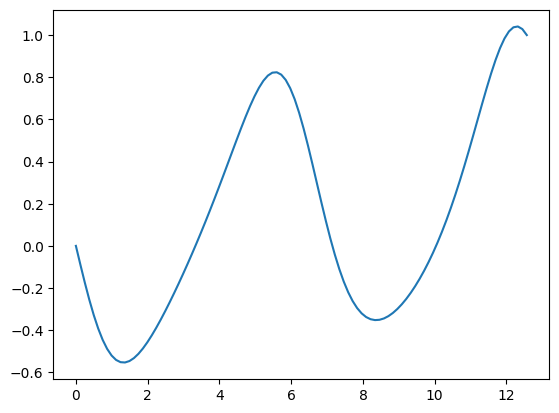

In [24]:

F_soln = np.zeros(N+2)
F_soln[0] = fa
F_soln[1:-1] = F
F_soln[-1] = fb

plt.plot(x_space, F_soln)
plt.show()

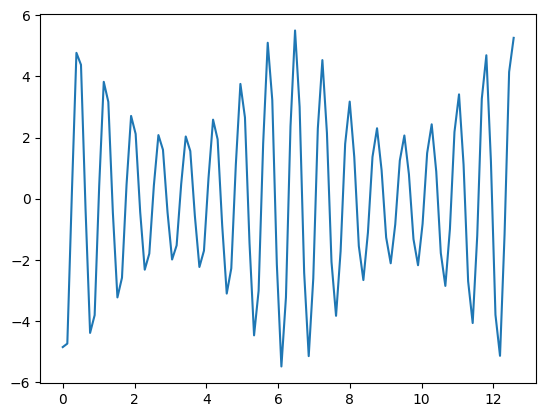

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

p = lambda x: math.sin(x)
q = lambda x: 1
s = lambda x: 0

a, b = 0, 4 * math.pi
N = 100
dx = (b - a) / (N)

# boundary
fa = 0
fb = 1

pre_term = lambda x: (1 / dx**2) - p(x) / (2 * dx)
mid_term = lambda x: q(x) - 2 / (2 * (dx ** 2))
pos_term = lambda x: (1 / dx**2) + p(x) / (2 * dx)

x_space = np.linspace(a, b, N)

D = np.zeros((N, N))

for i, x in enumerate(x_space):
    D[i, i] = mid_term(x)
    if i > 0:
        D[i, i - 1] = pre_term(x_space[i - 1])
    if i < N - 1:
        D[i, i + 1] = pos_term(x_space[i + 1])

B = np.zeros((N, 1))
B[0] = pre_term(x_space[0])*fa
B[N - 1] = pos_term(x_space[N - 1])*fb

S = np.zeros((N, 1))

F = np.dot(np.linalg.inv(D), (S - B).reshape(-1, 1))

plt.plot(x_space, F)
plt.show()
